1. Importing Libraries and Loading the Dataset

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
#Used text to column option in EXCEL to properly load the data.

In [6]:
df=pd.read_csv('bank-full.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


2. Basic Information about the Dataset

In [12]:
df.shape #17 columns

(45211, 17)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [10]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [14]:
df.isnull().sum() #No NA Values

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [15]:
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [17]:
df['marital'].value_counts()

marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

In [18]:
df['loan'].unique()

array(['no', 'yes'], dtype=object)

In [19]:
df['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [20]:
#EDA - Visualizations

In [21]:
# a) Visualizing the Target Variable

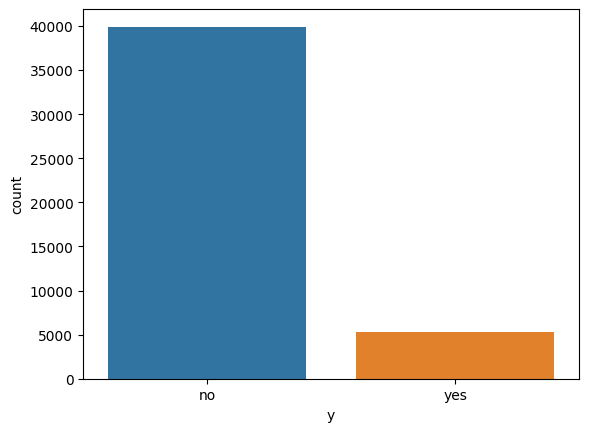

In [22]:
sns.countplot(x='y',data=df)
plt.show()

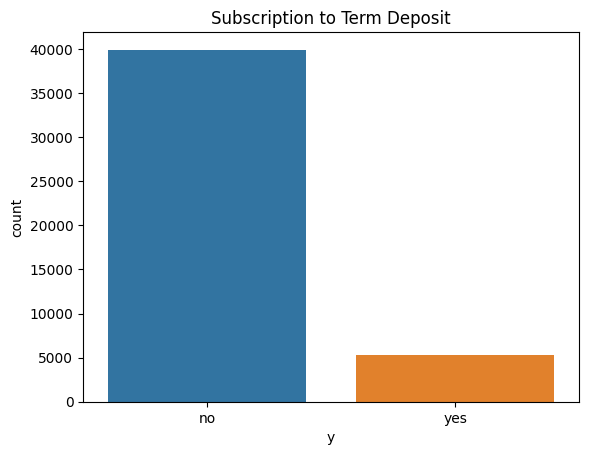

In [24]:
sns.countplot(x='y',data=df)
plt.title("Subscription to Term Deposit")
plt.show()

In [25]:
# b) Visualizing Categorical Variables

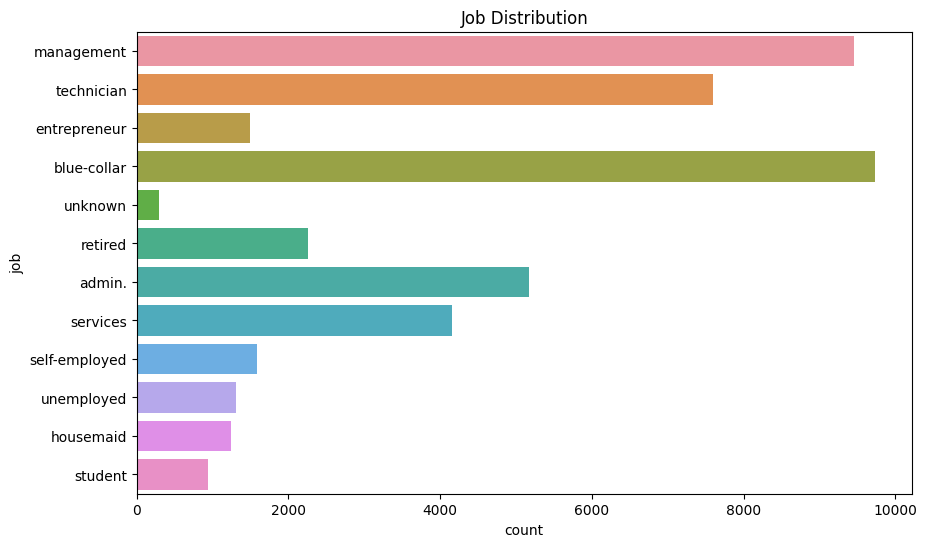

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(y='job', data=df)
plt.title('Job Distribution')
plt.show()

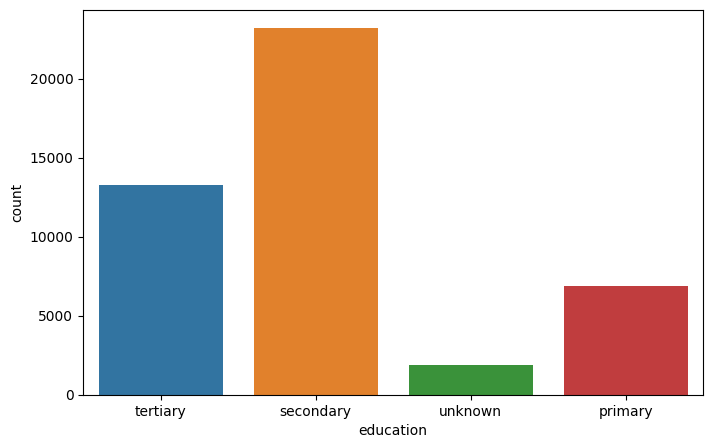

In [31]:
plt.figure(figsize=(8,5))
sns.countplot(x='education',data=df)
plt.show()

In [32]:
#c) Visualizing Numerical Variables

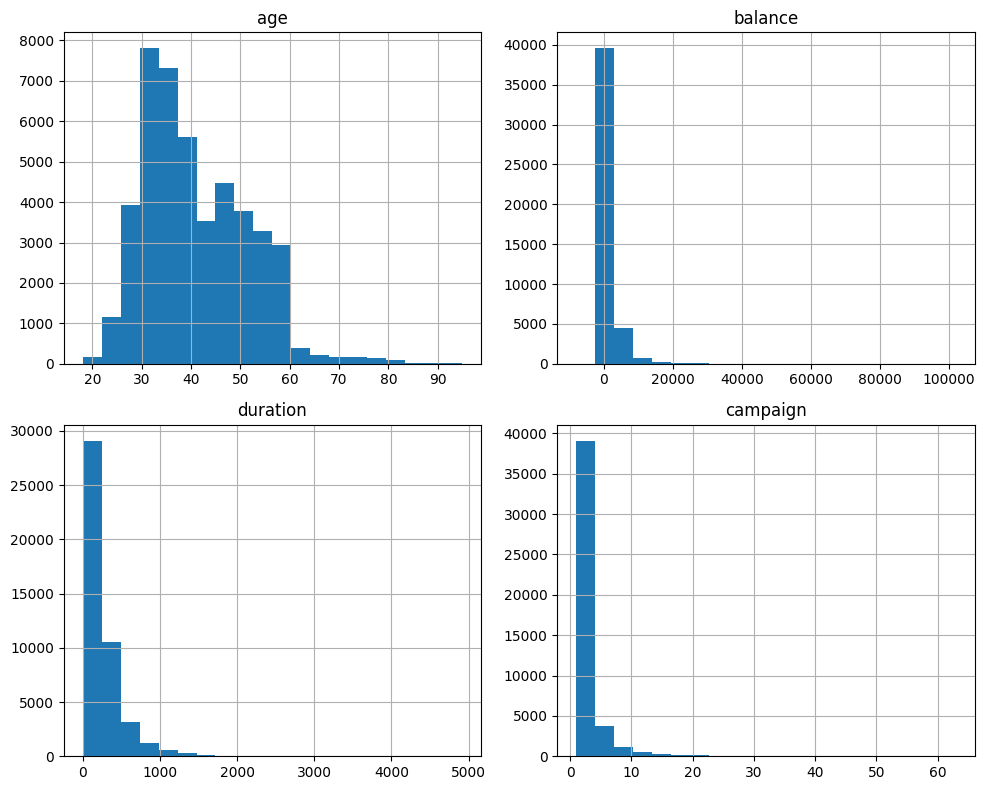

In [33]:
df.hist(['age', 'balance', 'duration', 'campaign'], bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

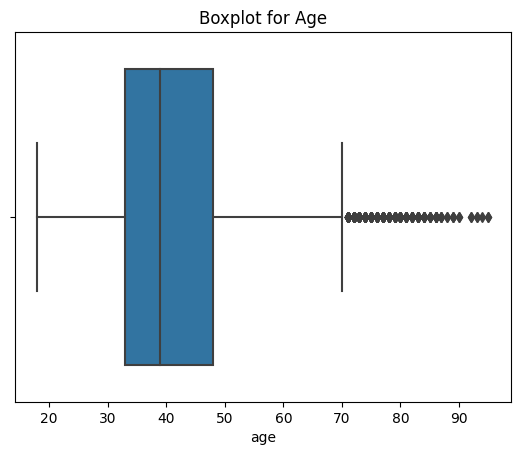

In [34]:
# Boxplot for numerical variables (to check outliers)
sns.boxplot(x=df['age'])
plt.title("Boxplot for Age")
plt.show()

4. Handling Categorical Variables

In [36]:
# One-Hot Encoding for categorical features
df_encoded = pd.get_dummies(df, columns=['job', 'marital', 'education', 'default', 
                                         'housing', 'loan', 'contact', 'month', 
                                         'poutcome'], drop_first=True)

# Check the transformed dataset
df_encoded.head()


,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,no,False,False,...,False,False,False,True,False,False,False,False,False,True
1,44,29,5,151,1,-1,0,no,False,False,...,False,False,False,True,False,False,False,False,False,True
2,33,2,5,76,1,-1,0,no,False,True,...,False,False,False,True,False,False,False,False,False,True
3,47,1506,5,92,1,-1,0,no,True,False,...,False,False,False,True,False,False,False,False,False,True
4,33,1,5,198,1,-1,0,no,False,False,...,False,False,False,True,False,False,False,False,False,True


In [38]:
df_encoded.shape

(45211, 43)

5. Handling Outliers

In [39]:
#Detecting Outliers with the IQR Method

In [40]:
# Outlier detection using IQR method for 'balance'
Q1 = df['balance'].quantile(0.25)
Q3 = df['balance'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers for 'balance'
df_filtered = df[(df['balance'] >= lower_bound) & (df['balance'] <= upper_bound)]

# Check the new shape of the dataset
df_filtered.shape


(40482, 17)

6. Handling Missing Data

In [42]:
# Here there are 0 NA values
# Fill missing values (if any) with median or mode for categorical and numerical columns
#df.fillna(df.median(), inplace=True)


7. Feature Scaling (Normalization/Standardization)

In [43]:
# Initialize the scaler
scaler = StandardScaler()

# List of numerical columns to scale
columns_to_scale = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

# Apply scaling to the relevant columns
df_encoded[columns_to_scale] = scaler.fit_transform(df_encoded[columns_to_scale])

# Display the scaled columns
df_encoded.head()


,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,1.606965,0.256419,5,0.011016,-0.569351,-0.411453,-0.25194,no,False,False,...,False,False,False,True,False,False,False,False,False,True
1,0.288529,-0.437895,5,-0.416127,-0.569351,-0.411453,-0.25194,no,False,False,...,False,False,False,True,False,False,False,False,False,True
2,-0.747384,-0.446762,5,-0.707361,-0.569351,-0.411453,-0.25194,no,False,True,...,False,False,False,True,False,False,False,False,False,True
3,0.571051,0.047205,5,-0.645231,-0.569351,-0.411453,-0.25194,no,True,False,...,False,False,False,True,False,False,False,False,False,True
4,-0.747384,-0.447091,5,-0.233620,-0.569351,-0.411453,-0.25194,no,False,False,...,False,False,False,True,False,False,False,False,False,True


8. Splitting the Dataset

In [44]:
# Define features (X) and target (y)
X = df_encoded.drop('y', axis=1)
y = df_encoded['y'].apply(lambda x: 1 if x == 'yes' else 0)  # Convert to binary

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shapes of training and test sets
X_train.shape, X_test.shape


((31647, 42), (13564, 42))